# What factors influence likelihood of survival to fledging in white browed sparrow weavers chicks?

Reading in the data and importing packages

In [326]:
import pandas as pd # import package pandas
import numpy as np # import package numpyt
import matplotlib.pyplot as plt # import matplotlib
data = pd.read_csv("hatching.csv") # read in data as a panda
data.head() # check data headings

,EggsLaid,Sex,MassOnChick2HatchDate,HatchDate,HatchDayMass,EggLength,EggWidth,Fledged,dayofyear,month
0,3,F,3.01,10/01/2014,1.99,24.8,15.3,YES,10,5
1,2,U,2.22,02/01/2016,2.22,NaN,NaN,NO,2,5
2,2,U,2.34,17/01/2013,2.34,NaN,NaN,NO,17,5
3,2,U,2.39,17/01/2013,2.39,24.5,15.0,NO,17,5
4,3,U,5.16,12/01/2014,2.42,24.1,15.7,NO,12,5


Here, each row is a chick, Eggslaid is the number of eggs laid in this chicks clutch, sex is the chicks sex (U is unknown), HatchDate is date the chick hatched, HatchDayMass is the mass of the chick on the day it hatched, EggLength and EggWdith are the length and width of the egg the chick came from, Fledged is whether or not the chick survived to fledging, dayofyear is HatchDate converted to the day of the year, month is the month the chick hatched.

I am interested in what factors influence likelihood of survival to fledging (variable "Fledged"). Egg size might be important here, as bigger eggs mean more resources for the chick. I don't have a measure of egg volume, but I can produce an estimate of it using egg length and egg width, using the equation to calculate an ellipsoid's volume. Eggs are not actually this shape, but this is a good estimation based on the parameters I have. Below I create a new variable "EggVolume".

In [327]:
data["EggVolume"] = (4/3)*3.141592653589793*((data["EggLength"])/2)*((data["EggWidth"])/2)*((data["EggWidth"])/2) # create new variable

data.head() # check the headings

,EggsLaid,Sex,MassOnChick2HatchDate,HatchDate,HatchDayMass,EggLength,EggWidth,Fledged,dayofyear,month,EggVolume
0,3,F,3.01,10/01/2014,1.99,24.8,15.3,YES,10,5,3039.717087
1,2,U,2.22,02/01/2016,2.22,NaN,NaN,NO,2,5,NaN
2,2,U,2.34,17/01/2013,2.34,NaN,NaN,NO,17,5,NaN
3,2,U,2.39,17/01/2013,2.39,24.5,15.0,NO,17,5,2886.338250
4,3,U,5.16,12/01/2014,2.42,24.1,15.7,NO,12,5,3110.390879


In [328]:
data.dtypes # check the data type for each column

EggsLaid                   int64
Sex                       object
MassOnChick2HatchDate    float64
HatchDate                 object
HatchDayMass             float64
EggLength                float64
EggWidth                 float64
Fledged                   object
dayofyear                  int64
month                      int64
EggVolume                float64
dtype: object

In [329]:
data = data.dropna()

I think it is likely that many of these variables are correlated. For example, it is probable bigger eggs produce chicks with a higher HatchDayMass. Below I produce a heatmap of correlations for the columns in my dataframe. 

<AxesSubplot:>

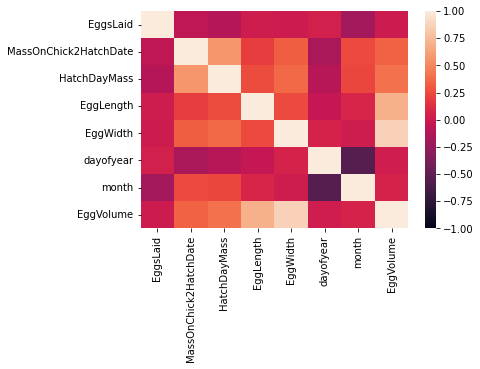

In [330]:
import seaborn as sns # import seaborn 
sns.heatmap(data.corr(), vmin=-1.0, vmax=1.0) # plot a heatmap of correlations between continuous variables, range is -1 to 1, as these values denote perfect negative and positive correlations, respectively

This reveals lots of correlations between variables. It looks like EggVolume and HatchDayMass are indeed correlated. I will plot this as a scatterplot below to get a better idea of this correlation.

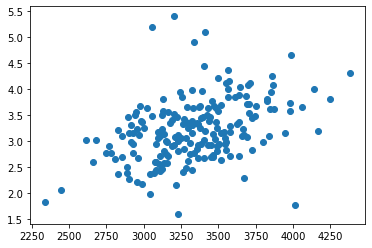

In [331]:
Y=data['HatchDayMass'] # set HatchDayMass as object Y, the response or dependent variable
X=data['EggVolume'] # set EggVolume as object X, the explanatory or independent variable
plt.scatter(X,Y) # plot Y as a function of X, in a scatterplot

There appears to be a reasonably strong correlation here. I will need to be aware of this when infering patterns from my analyses. For now though I am going to see if there is a difference between those who fledge, and those who don't in both their egg volumes, and hatch day masses. It is probably not useful to include chicks who's fledging status is unknown, so I will first remove these individuals from the dataset.

In [332]:
data = data[data["Fledged"] != "UNK"] # Here I filter out all rows where Fledged = UNK

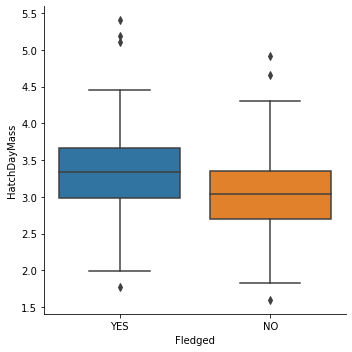

In [333]:
sns.catplot(data=data, x="Fledged", y="HatchDayMass", kind="box") # produce boxplot with Fledged on the X axis, and HatchDayMass on the Y axis

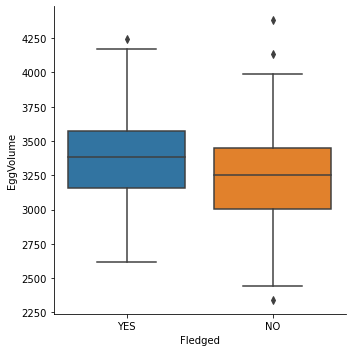

In [334]:
sns.catplot(data=data, x="Fledged", y="EggVolume", kind="box") # produce boxplot with Fledged on the X axis, and EggVolume on the Y axis

It seems like chicks who survive to fledging tend towards a higher egg volume and a higher hatch day mass. It seems likely that number of eggs laid may influence these variables, as more eggs laid would mean less resources invested into each egg (if resources are fixed between females, which is unlikely to be true). I will see if these variables differ depending on number of eggs laid.

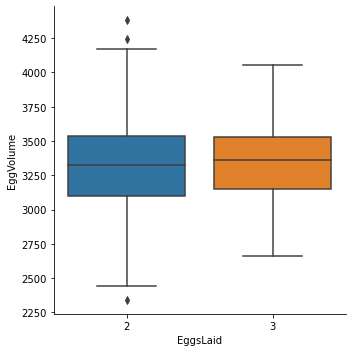

In [335]:
sns.catplot(data=data, x="EggsLaid", y="EggVolume", kind="box") # produce boxplot with EggsLaid on the X axis, and EggVolume on the Y axis

It seems there is no difference in EggVolume between EggsLaid values of 2 and 3. This is just speculation, but perhaps females that lay 3 eggs do so because they have more resources to begin with, or perhaps egg size is relatively fixed due to physiology? we cannot answer these questions with these data.

Based on visual inspection of the above plots, it seems HatchDayMass is likely the best predictor of survival to fledging (of the three variables I tested). I am now going to build a model using HatchDayMass to predict Fledged. First I split the data into the test set, and the train set. The train set will be used to build the model, and the test set will then be used to test the model.

In [336]:
from sklearn.model_selection import train_test_split
Y=data['Fledged'] # set Fledged as object Y, the response or dependent variable
X=data[['HatchDayMass']] # set HatchDayMass as object X, the explanatory or independent variable

train_X, test_X, train_y, test_y = train_test_split(X, Y, random_state=40) # split the data into a training set and a test set

Here I just plot the data out, this isn't particularly informative, but it will confirm that the data has been split into test and train.

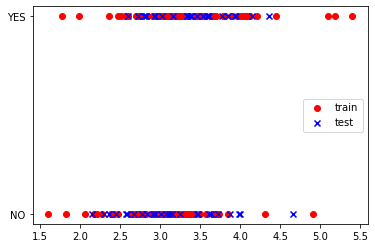

In [337]:
fig, ax = plt.subplots() # create the figure and axes

ax.scatter(train_X, train_y, color="red", marker="o", label="train") # plot the train data on the figure
ax.scatter(test_X, test_y, color="blue", marker="x", label="test") # plot the test data on the figure
ax.legend()

As fledged is a binomial variable, I will need to use the logistic regression tool from sklearn.linear_model to make this model.

In [338]:
from sklearn.linear_model import LogisticRegression # Load in the logistic regression function

model = LogisticRegression(fit_intercept=True) # Here I specify the model
model.fit(train_X, train_y) # Here I train the model on the training data

LogisticRegression()

In [339]:
model.score(test_X, test_y) # Now I get a score for how well the model can predict whether a chick from the test data fledged or not, based on the model fit I created above

0.5833333333333334

I got a score of 0.666. I will now try this again, but will use EggVolume as the predictor. I can then which variable is a better predictor of survival to fledging. 

In [340]:
Y=data['Fledged'] # set Fledged as object Y, the response or dependent variable
X=data[['EggVolume']] # set EggVolume as object X, the explanatory or independent variable
train_X, test_X, train_y, test_y = train_test_split(X, Y, random_state=40) # split the data into a training set and a test set
model = LogisticRegression(fit_intercept=True) # Here I specify the model
model.fit(train_X, train_y) # Here I train the model on the training data
model.score(test_X, test_y) # Now I get a score for how well the model can predict whether a chick from the test data fledged or not, based on the model fit I created above

0.4791666666666667

It appears that HatchDayMass is a better predictor of whether a chick will survive to fledging than EggVolume is.

Finally, I am going to investigate if the proportion of chicks surviving to fledging differs depending on the time of year they hatch. First, I am going to make a density plot with month on the x axis, to see the distribution of when chicks tend to hatch. Note, month number is in relation to the breeding season start. "1" is September, "2" is October etc.

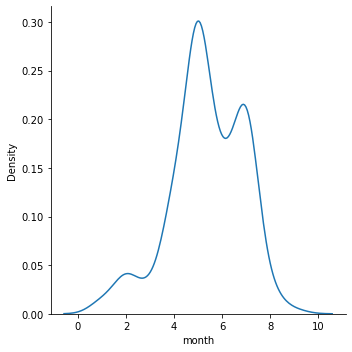

In [355]:
sns.displot(data=data, x="month", kind="kde")

Now I am going to separate the density plot by chicks that fledge and those that do not fledge. 

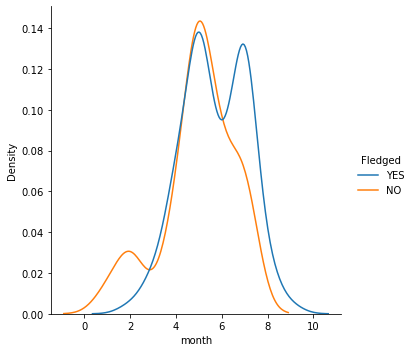

In [354]:
sns.displot(data=data, x="month", hue="Fledged", kind="kde")

It seems that chicks that hatch very early in the season are much less likely to survive than those that hatch during the main middle period of the breeding season, and chicks that hatch very late in the season are more likely to fledge than those born in the middle period. Lastly, I am going to model this as a logistic regression as well.

In [360]:
Y=data['Fledged'] # set Fledged as object Y, the response or dependent variable
X=data[['month']] # set month as object X, the explanatory or independent variable
train_X, test_X, train_y, test_y = train_test_split(X, Y, random_state=40) # split the data into a training set and a test set
model = LogisticRegression(fit_intercept=True) # Here I specify the model
model.fit(train_X, train_y) # Here I train the model on the training data
model.score(test_X, test_y) # Now I get a score for how well the model can predict whether a chick from the test data fledged or not, based on the model fit I created above

0.5